In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 

In [ ]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [ ]:
train_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
train_df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
import spacy

In [ ]:
pd.crosstab(index=train_df['label'],columns='count')

col_0,count
label,
0,29720
1,2242


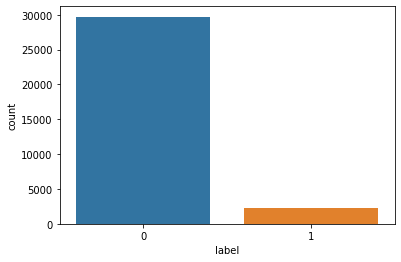

In [ ]:
import seaborn as sns
sns.countplot(x='label',data=train_df)

Empty model with Spacy , use TextCategorizer within model

In [ ]:
nlp=spacy.blank('en')
classifier = nlp.create_pipe('textcat',config={'exclusive_classes':True,'architecture' : 'bow'})
nlp.add_pipe(classifier)
classifier.add_label('positive')
classifier.add_label('negative')

1

Convert tweet text data to the input form for TextCategorizer. Set separate labels for the classes 'Racist/sexist' and 'Non-racist/sexist'

In [ ]:
train_data=train_df['tweet'].values
train_label=[{'cats':{'positive':label==1,
                    'negative':label==0}} for label in train_df['label']]
train_list=list(zip(train_data,train_label))
train_list

[(' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
  {'cats': {'NON_RACIST/SEXIST': True, 'RACIST/SEXIST': False}}),
 ("@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
  {'cats': {'NON_RACIST/SEXIST': True, 'RACIST/SEXIST': False}}),
 ('  bihday your majesty',
  {'cats': {'NON_RACIST/SEXIST': True, 'RACIST/SEXIST': False}}),
 ('#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
  {'cats': {'NON_RACIST/SEXIST': True, 'RACIST/SEXIST': False}}),
 (' factsguide: society now    #motivation',
  {'cats': {'NON_RACIST/SEXIST': True, 'RACIST/SEXIST': False}}),
 ('[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
  {'cats': {'NON_RACIST/SEXIST': True, 'RACIST/SEXIST': False}}),
 (' @user camping tomo

In [ ]:
from spacy.util import minibatch
import random
random.seed(1)
spacy.util.fix_random_seed(1)
optimizer=nlp.begin_training()
losses={}


Training the model 

In [ ]:
for epoch in range(10):
    random.shuffle(train_list)
    batches=minibatch(train_list,size=24)
    for batch in batches:
        text,labels=zip(*batch)
        nlp.update(text,labels,sgd=optimizer,losses=losses)
        #print(losses,batch,epoch)

KeyboardInterrupt: ignored

In [ ]:
test_df.head(10)
test_df['tweet']

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [ ]:
test=[nlp.tokenizer(text) for text in test_df['tweet']]


Predict results on test data

In [ ]:
classifier=nlp.get_pipe('textcat')
scores,_=classifier.predict(test)
print(scores)

[[3.0793160e-02 9.6920681e-01]
 [4.8057756e-01 5.1942241e-01]
 [4.2822056e-05 9.9995720e-01]
 ...
 [7.2106719e-03 9.9278933e-01]
 [2.2174803e-05 9.9997783e-01]
 [3.6801785e-04 9.9963200e-01]]


In [ ]:
predict_label=scores.argmax(axis=1)
count=0
for pred in predict_label:
  print(test_df['tweet'][count],'racist/sexist'if pred==0 else "non_racist/sexist")
  count+=1

Streaming output truncated to the last 5000 lines.
 â #aud/usd better bid, re-attempts 0.7400 on aus data   #blog #silver #gold #forex non_racist/sexist
we'll be there at #hrss16 and #recex16 - will you?  #ms  non_racist/sexist
officially at the airpo. boarding about to sta! woohoo    #travel #backpackerliâ¦   non_racist/sexist
 livelypics: sometimes the best way to solve a problem is to just stop caring.   #motivation non_racist/sexist
8yr ben   @user visiting his manor  #maidstone 2wks @user @user @user ð¯  non_racist/sexist
i hate life and helen and all her stupid antics!! i hate her so much   racist/sexist
@user by "occupation", some israelis mean west bank &amp; maybe gaza. palestinians mean all of that + the entire state of israel   racist/sexist
a fantastic performance by @user 14's beating wba today. #development   #coaches #deservedwin non_racist/sexist
good day #wednesday   my #dilis in #veggie     #eating #enjoy #life #blessed   #feelingâ¦  non_racist/sexist
going to a